In [1]:
# Importing the required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_df = pd.read_csv(r"D:/Banking_Final_Project/loan_data.csv")
loan_df.head()

,Loan ID,Customer ID,Loan Status,Loan Amount,Term,Credit Score,Annual Income,Purpose,Number of Open Accounts
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,Home Improvements,6
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,Debt Consolidation,35
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,Debt Consolidation,18
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,Debt Consolidation,9
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,Debt Consolidation,15


In [3]:
# Checking the info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan ID                  100000 non-null  object 
 1   Customer ID              100000 non-null  object 
 2   Loan Status              100000 non-null  object 
 3   Loan Amount              100000 non-null  int64  
 4   Term                     100000 non-null  object 
 5   Credit Score             80846 non-null   float64
 6   Annual Income            80846 non-null   float64
 7   Purpose                  100000 non-null  object 
 8   Number of Open Accounts  100000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 6.9+ MB


In [4]:
# Id columns are not required so drop those columns
loan_df.drop(columns=["Loan ID","Customer ID"],inplace=True)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan Status              100000 non-null  object 
 1   Loan Amount              100000 non-null  int64  
 2   Term                     100000 non-null  object 
 3   Credit Score             80846 non-null   float64
 4   Annual Income            80846 non-null   float64
 5   Purpose                  100000 non-null  object 
 6   Number of Open Accounts  100000 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.3+ MB


In [6]:
# Checking the missing value percentage
loan_df.isnull().sum()/len(loan_df)*100

Loan Status                 0.000
Loan Amount                 0.000
Term                        0.000
Credit Score               19.154
Annual Income              19.154
Purpose                     0.000
Number of Open Accounts     0.000
dtype: float64

In [7]:
# Handling the missing values
loan_df = loan_df.dropna()

In [8]:
loan_df.isnull().sum()

Loan Status                0
Loan Amount                0
Term                       0
Credit Score               0
Annual Income              0
Purpose                    0
Number of Open Accounts    0
dtype: int64

In [9]:
loan_df.describe()

,Loan Amount,Credit Score,Annual Income,Monthly Debt,Number of Open Accounts
count,8.084600e+04,80846.000000,8.084600e+04,80846.000000,80846.000000
mean,1.447443e+07,1076.456089,1.378277e+06,18510.579017,11.143334
std,3.480085e+07,1475.403791,1.081360e+06,12233.909830,5.029085
min,1.124200e+04,585.000000,7.662700e+04,0.000000,1.000000
25%,1.864555e+05,705.000000,8.488440e+05,10244.040000,8.000000
50%,3.246980e+05,724.000000,1.174162e+06,16256.115000,10.000000
75%,5.496150e+05,741.000000,1.650663e+06,24050.865000,14.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,76.000000


In [9]:
# 99999999 is invalid number in Loan Amount. So we need to remove those values.
loan_df_cleaned = loan_df[loan_df["Loan Amount"] != 99999999]

In [11]:
loan_df_cleaned.describe()

,Loan Amount,Credit Score,Annual Income,Number of Open Accounts
count,69362.000000,69362.000000,6.936200e+04,69362.000000
mean,314293.181800,1134.520977,1.373246e+06,11.144806
std,187557.969283,1585.367954,1.103906e+06,5.026430
min,11242.000000,585.000000,7.662700e+04,1.000000
25%,172727.500000,704.000000,8.462790e+05,8.000000
50%,268466.000000,722.000000,1.167759e+06,10.000000
75%,434192.000000,740.000000,1.644564e+06,14.000000
max,789250.000000,7510.000000,1.655574e+08,76.000000


In [12]:
loan_df_cleaned['Purpose'].value_counts()

Purpose
Debt Consolidation      54268
other                    4389
Home Improvements        4005
Other                    2241
Business Loan            1157
Buy a Car                 847
Medical Bills             790
Buy House                 492
Take a Trip               413
major_purchase            237
small_business            208
moving                    105
Educational Expenses       68
wedding                    68
vacation                   66
renewable_energy            8
Name: count, dtype: int64

In [13]:
# Other category is repeated. Make this a single catergory
loan_df_cleaned['Purpose'] = loan_df_cleaned['Purpose'].str.replace('other','Other')

In [14]:
loan_df_cleaned['Purpose'].value_counts()

Purpose
Debt Consolidation      54268
Other                    6630
Home Improvements        4005
Business Loan            1157
Buy a Car                 847
Medical Bills             790
Buy House                 492
Take a Trip               413
major_purchase            237
small_business            208
moving                    105
Educational Expenses       68
wedding                    68
vacation                   66
renewable_energy            8
Name: count, dtype: int64

In [15]:
loan_df_cleaned.dtypes

Loan Status                 object
Loan Amount                  int64
Term                        object
Credit Score               float64
Annual Income              float64
Purpose                     object
Number of Open Accounts      int64
dtype: object

In [16]:
# Changing the datatypes
loan_df_cleaned["Credit Score"] = loan_df_cleaned["Credit Score"].astype('int64')
loan_df_cleaned["Annual Income"] = loan_df_cleaned["Annual Income"].astype('int64')

In [17]:
loan_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69362 entries, 0 to 99998
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Loan Status              69362 non-null  object
 1   Loan Amount              69362 non-null  int64 
 2   Term                     69362 non-null  object
 3   Credit Score             69362 non-null  int64 
 4   Annual Income            69362 non-null  int64 
 5   Purpose                  69362 non-null  object
 6   Number of Open Accounts  69362 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 4.2+ MB


EDA

<Axes: xlabel='Term', ylabel='count'>

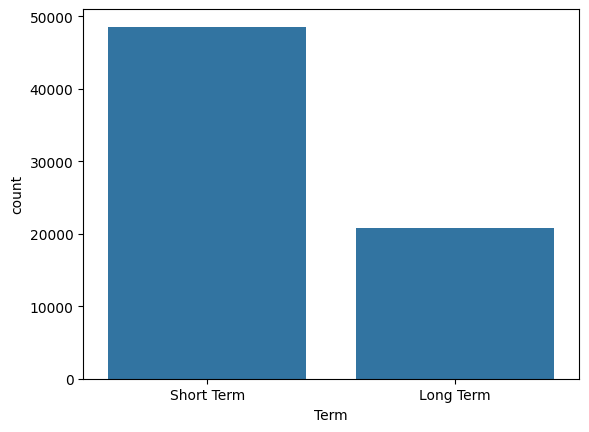

In [18]:
sns.countplot(data=loan_df_cleaned,x=loan_df_cleaned["Term"])

In [19]:
loan_df_cleaned["Purpose"].value_counts()

Purpose
Debt Consolidation      54268
Other                    6630
Home Improvements        4005
Business Loan            1157
Buy a Car                 847
Medical Bills             790
Buy House                 492
Take a Trip               413
major_purchase            237
small_business            208
moving                    105
Educational Expenses       68
wedding                    68
vacation                   66
renewable_energy            8
Name: count, dtype: int64

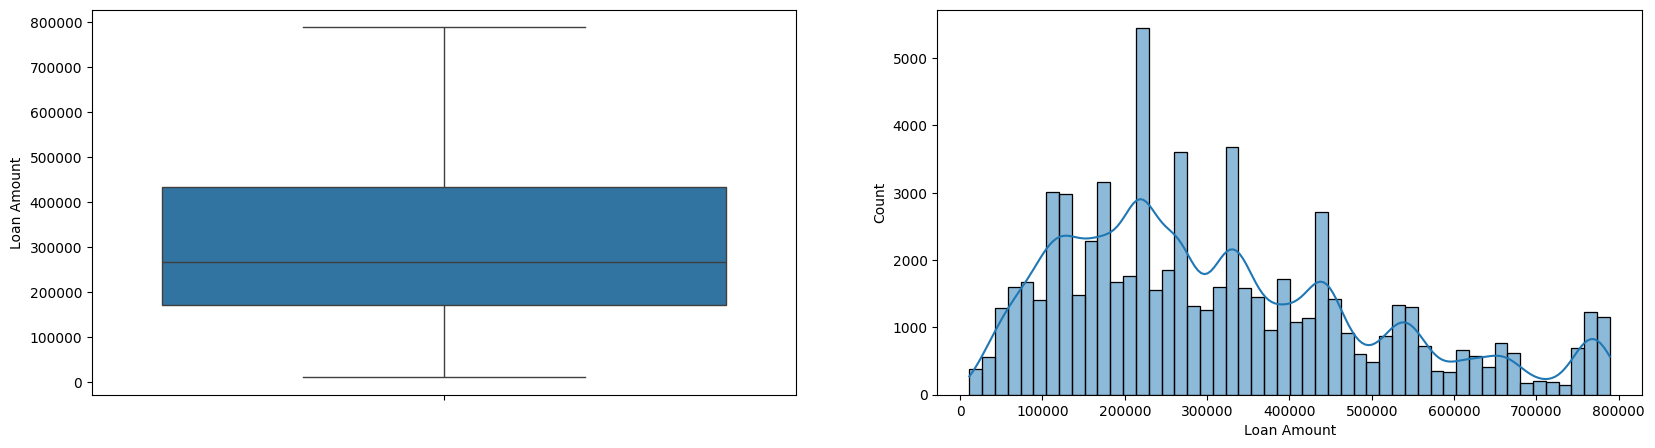

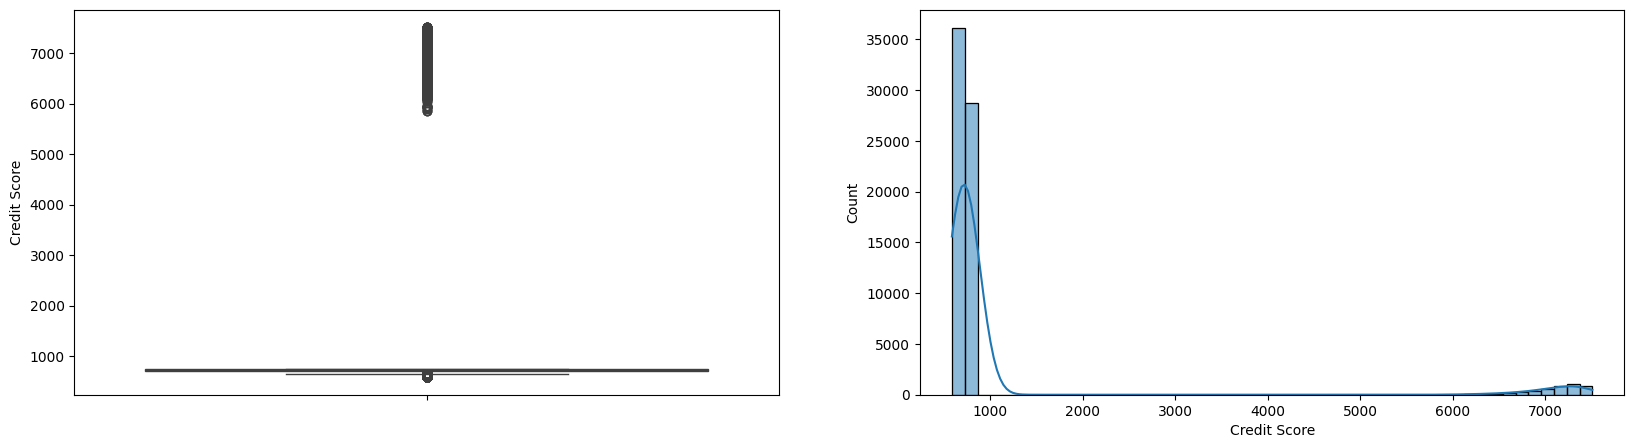

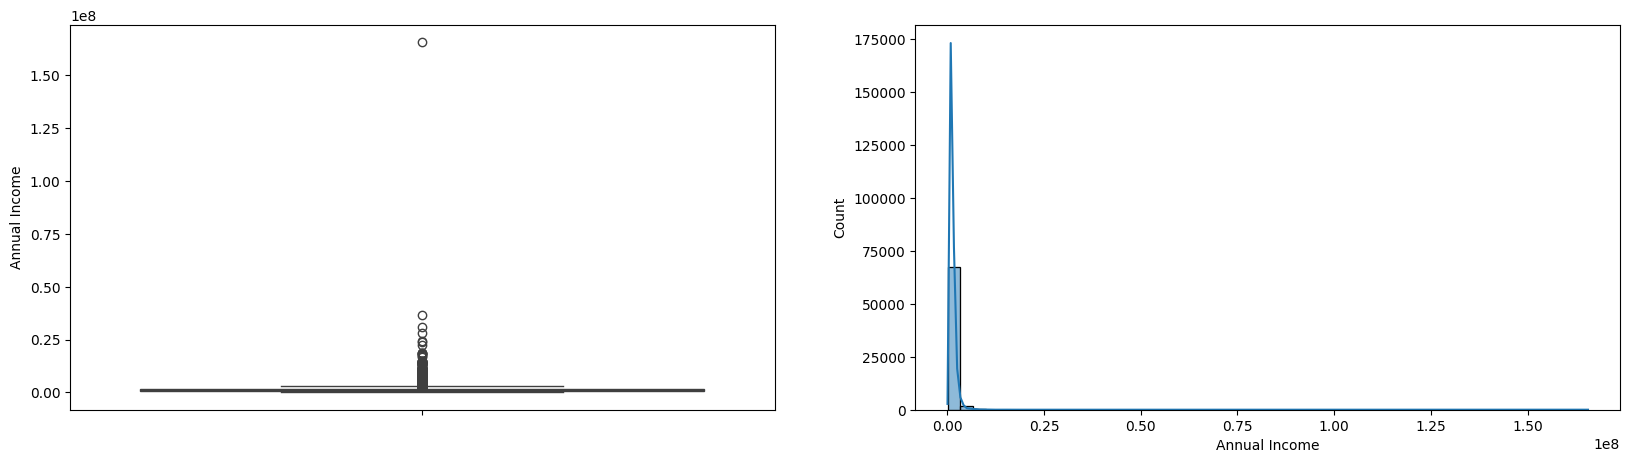

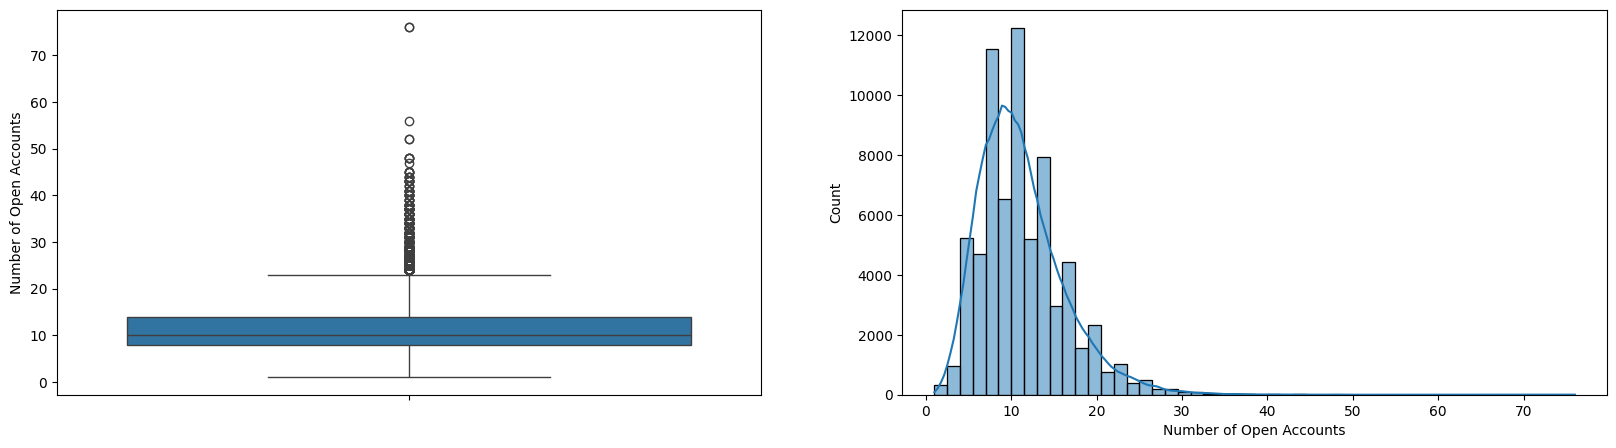

In [21]:
# Checking the skewness and outliers
for i in ["Loan Amount","Credit Score","Annual Income","Number of Open Accounts"]:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(loan_df_cleaned[i])
    
    plt.subplot(1,2,2)
    sns.histplot(loan_df_cleaned[i],kde=True,bins=50)
    plt.show()


In [22]:
# Credit Score, Annual Income and Monthly Debt data are highly skewed. 
# So we need to transform these columns
loan_df1= loan_df_cleaned.copy()
loan_df1['Credit_Score_log'] = np.log(loan_df1['Credit Score'])
loan_df1['Annual_Income_log'] = np.log(loan_df1['Annual Income'])
loan_df1['No_of_Accounts_log'] = np.log(loan_df1['Number of Open Accounts'])

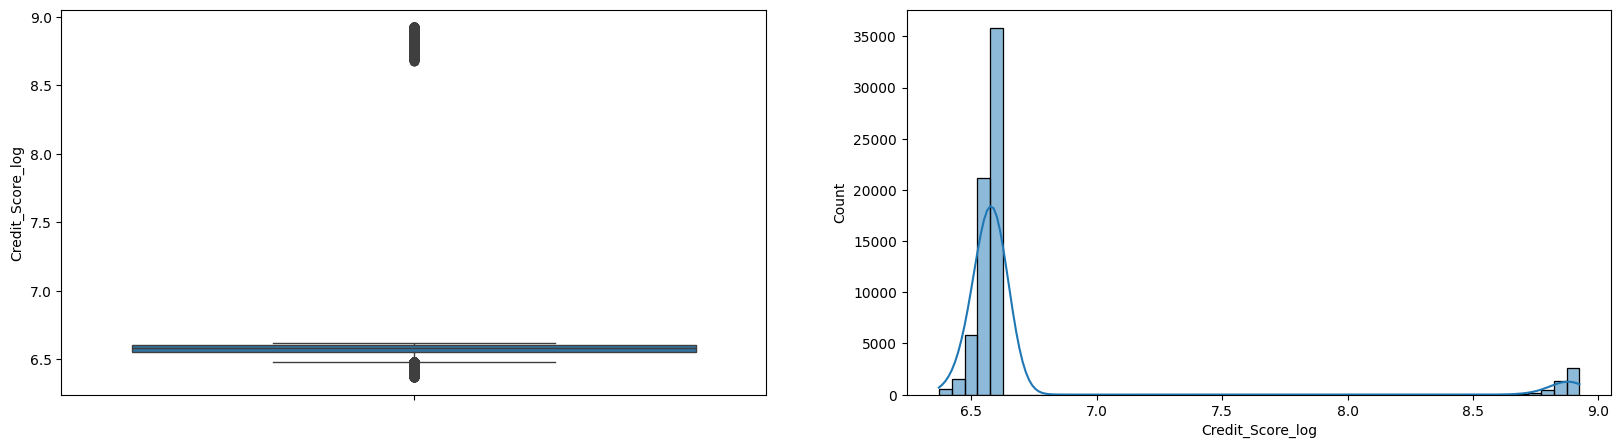

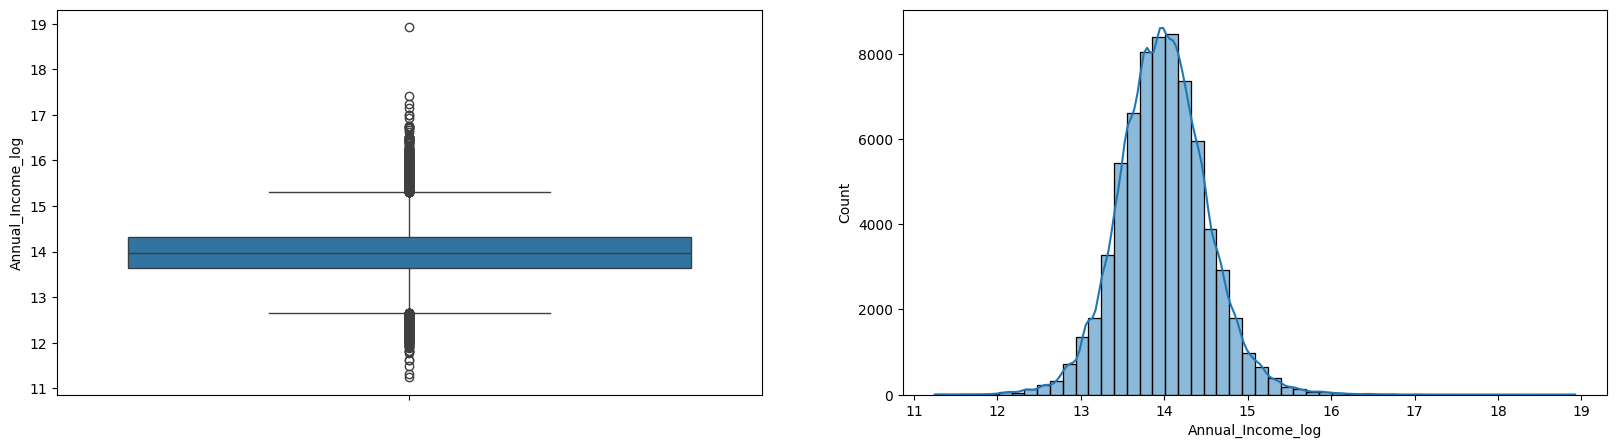

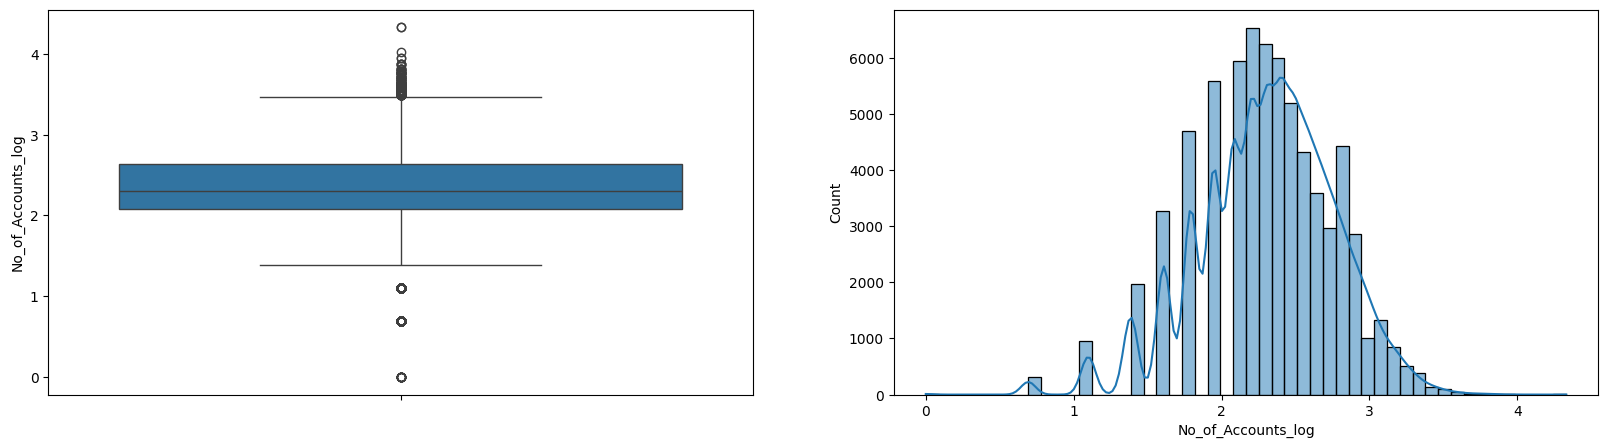

In [23]:
for i in ["Credit_Score_log","Annual_Income_log","No_of_Accounts_log"]:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(loan_df1[i])
    
    plt.subplot(1,2,2)
    sns.histplot(loan_df1[i],kde=True,bins=50)
    plt.show()

In [24]:
# Drop the skewed columns
loan_df1.drop(columns=["Credit Score","Annual Income","Number of Open Accounts"], inplace=True)
loan_df1

,Loan Status,Loan Amount,Term,Purpose,Credit_Score_log,Annual_Income_log,No_of_Accounts_log
0,Fully Paid,445412,Short Term,Home Improvements,6.563856,13.970369,1.791759
3,Fully Paid,347666,Long Term,Debt Consolidation,6.580639,13.601016,2.197225
5,Charged Off,206602,Short Term,Debt Consolidation,8.894259,13.706652,1.791759
6,Fully Paid,217646,Short Term,Debt Consolidation,6.593045,13.984573,2.564949
8,Fully Paid,548746,Short Term,Debt Consolidation,6.519147,14.755170,1.386294
...,...,...,...,...,...,...,...
99993,Fully Paid,44484,Short Term,small_business,6.575076,13.957380,1.791759
99994,Fully Paid,210584,Short Term,Other,6.577861,13.571385,1.791759
99995,Fully Paid,147070,Short Term,Other,6.586172,13.071990,1.609438
99997,Fully Paid,103136,Short Term,Debt Consolidation,6.609349,13.955746,2.484907


In [25]:
# "Credit_Score_log","Annual_Income_log","No_of_Accounts_log" have outliers
loan_df2 = loan_df1.copy()

In [26]:
# Handle these outliers using IQR method and clip the outlier values
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)


outlier(loan_df2, 'Credit_Score_log')
outlier(loan_df2, 'Annual_Income_log')
outlier(loan_df2, 'No_of_Accounts_log')

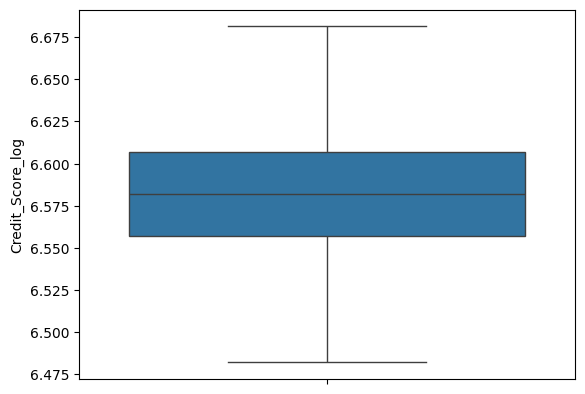

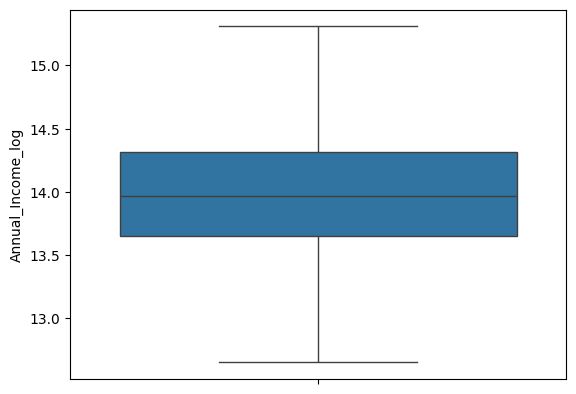

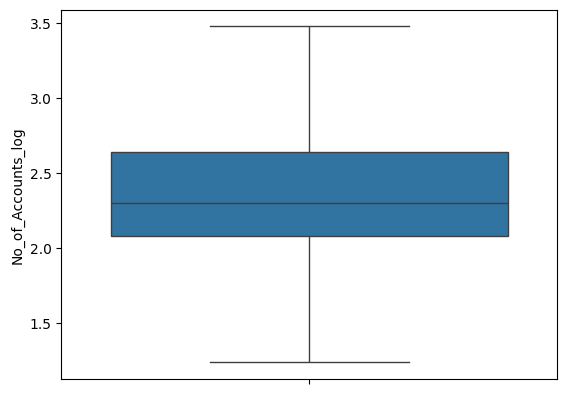

In [27]:
for i in ["Credit_Score_log","Annual_Income_log","No_of_Accounts_log"]:
    sns.boxplot(loan_df2[i])
    plt.show()

<Axes: >

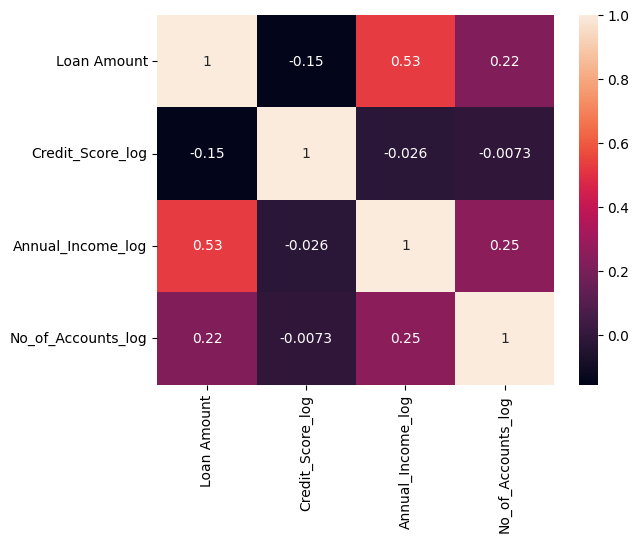

In [28]:
# Checking the correlation between numerical variables
corr= loan_df2[["Loan Amount","Credit_Score_log","Annual_Income_log","No_of_Accounts_log"]].corr()
sns.heatmap(corr,annot=True)

In [29]:
# There is no highly correlated columns, so no need to remove columns.

In [29]:
# Resetting the index
loan_df2.reset_index(drop=True, inplace=True)
loan_df2

,Loan Status,Loan Amount,Term,Purpose,Credit_Score_log,Annual_Income_log,No_of_Accounts_log
0,Fully Paid,445412,Short Term,Home Improvements,6.563856,13.970369,1.791759
1,Fully Paid,347666,Long Term,Debt Consolidation,6.580639,13.601016,2.197225
2,Charged Off,206602,Short Term,Debt Consolidation,6.681458,13.706652,1.791759
3,Fully Paid,217646,Short Term,Debt Consolidation,6.593045,13.984573,2.564949
4,Fully Paid,548746,Short Term,Debt Consolidation,6.519147,14.755170,1.386294
...,...,...,...,...,...,...,...
69357,Fully Paid,44484,Short Term,small_business,6.575076,13.957380,1.791759
69358,Fully Paid,210584,Short Term,Other,6.577861,13.571385,1.791759
69359,Fully Paid,147070,Short Term,Other,6.586172,13.071990,1.609438
69360,Fully Paid,103136,Short Term,Debt Consolidation,6.609349,13.955746,2.484907


In [30]:
loan_df2.to_csv("Final_loan_df.csv", index=False)

Classification Models - To predict loan defaults

In [31]:
# Import required libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from imblearn.over_sampling  import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_curve,auc
import pickle

In [32]:
final_df = loan_df2.copy()

In [33]:
final_df["Loan Status"].value_counts()

# There is class imbalance in dataset. So we need to handle this with  SMOTE technique

Loan Status
Fully Paid     52152
Charged Off    17210
Name: count, dtype: int64

In [34]:
# Convert string labels to numeric
final_df["Loan Status"] = final_df["Loan Status"].map({'Fully Paid':0, 'Charged Off':1})
final_df

,Loan Status,Loan Amount,Term,Purpose,Credit_Score_log,Annual_Income_log,No_of_Accounts_log
0,0,445412,Short Term,Home Improvements,6.563856,13.970369,1.791759
1,0,347666,Long Term,Debt Consolidation,6.580639,13.601016,2.197225
2,1,206602,Short Term,Debt Consolidation,6.681458,13.706652,1.791759
3,0,217646,Short Term,Debt Consolidation,6.593045,13.984573,2.564949
4,0,548746,Short Term,Debt Consolidation,6.519147,14.755170,1.386294
...,...,...,...,...,...,...,...
69357,0,44484,Short Term,small_business,6.575076,13.957380,1.791759
69358,0,210584,Short Term,Other,6.577861,13.571385,1.791759
69359,0,147070,Short Term,Other,6.586172,13.071990,1.609438
69360,0,103136,Short Term,Debt Consolidation,6.609349,13.955746,2.484907


In [35]:
OHE = OneHotEncoder(sparse_output=False, drop='first')
encoded= OHE.fit_transform(final_df[['Term','Purpose']])

In [36]:
encoded_df = pd.DataFrame(encoded, columns=OHE.get_feature_names_out(['Term', 'Purpose']))

In [37]:
encoded_data = pd.concat([final_df.drop(['Term', 'Purpose'], axis=1), encoded_df], axis=1)

In [38]:
encoded_data

,Loan Status,Loan Amount,Credit_Score_log,Annual_Income_log,No_of_Accounts_log,Term_Short Term,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,445412,6.563856,13.970369,1.791759,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,347666,6.580639,13.601016,2.197225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,206602,6.681458,13.706652,1.791759,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,217646,6.593045,13.984573,2.564949,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,548746,6.519147,14.755170,1.386294,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69357,0,44484,6.575076,13.957380,1.791759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
69358,0,210584,6.577861,13.571385,1.791759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69359,0,147070,6.586172,13.071990,1.609438,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69360,0,103136,6.609349,13.955746,2.484907,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X = encoded_data.drop('Loan Status', axis=1) 
y = encoded_data['Loan Status']

In [40]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train.shape

(55489, 19)

In [43]:
# Apply SMOTE on the training set
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [44]:
# Logistic regression model
LR_model = LogisticRegression()
LR_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [45]:
y_pred_train_lr = LR_model.predict(X_train_res)
print("Train_accuracy : ", accuracy_score(y_train_res, y_pred_train_lr))
y_pred_lr = LR_model.predict(X_test)
print("Test_accuracy : ", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Train_accuracy :  0.6173056672410492
Test_accuracy :  0.6349744107258704
              precision    recall  f1-score   support

           0       0.82      0.66      0.73     10368
           1       0.36      0.56      0.44      3505

    accuracy                           0.63     13873
   macro avg       0.59      0.61      0.58     13873
weighted avg       0.70      0.63      0.66     13873



In [46]:
# Train a model using DecisionTree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

In [47]:
# Evaluate the model
y_pred_train_dt = dt_model.predict(X_train_res)
print("Train_accuracy : ", accuracy_score(y_train_res, y_pred_train_dt))
y_pred_dt = dt_model.predict(X_test)
print("Test_accuracy : ", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Train_accuracy :  1.0
Test_accuracy :  0.7401427232754271
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     10368
           1       0.49      0.49      0.49      3505

    accuracy                           0.74     13873
   macro avg       0.66      0.66      0.66     13873
weighted avg       0.74      0.74      0.74     13873



In [54]:
# Random forest model 
rf_model = RandomForestClassifier(class_weight='balanced',random_state=42)
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [55]:
y_pred_train_rf = rf_model.predict(X_train_res)
print("Train_accuracy : ", accuracy_score(y_train_res, y_pred_train_rf))
y_pred_rf = rf_model.predict(X_test)
print("Test_accuracy : ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Train_accuracy :  1.0
Test_accuracy :  0.7838246954515966
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     10368
           1       0.60      0.42      0.50      3505

    accuracy                           0.78     13873
   macro avg       0.71      0.66      0.68     13873
weighted avg       0.77      0.78      0.77     13873



In [50]:
# Xgb model
Xgb_model = xgb.XGBClassifier()
Xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
y_pred_train_xgb = Xgb_model.predict(X_train_res)
print("Train_accuracy : ", accuracy_score(y_train_res, y_pred_train_xgb))
y_pred_xgb = Xgb_model.predict(X_test)
print("Test_accuracy : ", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Train_accuracy :  0.8159103963239518
Test_accuracy :  0.7820226338931738
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     10368
           1       0.61      0.39      0.48      3505

    accuracy                           0.78     13873
   macro avg       0.71      0.65      0.67     13873
weighted avg       0.76      0.78      0.77     13873



In [52]:
# KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [53]:
y_pred_train_knn = knn_model.predict(X_train_res)
print("Train_accuracy : ", accuracy_score(y_train_res, y_pred_train_knn))
y_pred_knn = knn_model.predict(X_test)
print("Test_accuracy : ", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Train_accuracy :  0.9179350947731189
Test_accuracy :  0.6761334967202479
              precision    recall  f1-score   support

           0       0.82      0.72      0.77     10368
           1       0.40      0.54      0.46      3505

    accuracy                           0.68     13873
   macro avg       0.61      0.63      0.61     13873
weighted avg       0.72      0.68      0.69     13873



In [71]:
# Hyper parameter tuning

param_grid = {
    'n_estimators': [200, 300, 400],   
    'max_depth': [3, 4, 5,],            
    'learning_rate': [0.05, 0.1,0.3],      
    'min_child_weight': [5, 6, 7],     
    'subsample': [0.8, 0.9,1.0],           
    'colsample_bytree': [0.8, 0.9],    
    'scale_pos_weight': [0.5, 1, 1.5, 2],     
}

random_search = RandomizedSearchCV(xgb.XGBClassifier(), param_distributions=param_grid, n_iter=50, scoring='f1', cv=5, verbose=1, 
                                   random_state=42, n_jobs=-1)

random_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9],
                                        'learning_rate': [0.05, 0.1, 0.3],
                                        'max_depth': [3, 4, 5, 7, 10],
                                        'min_child_weight': [5, 6, 7],
                                        'n_estimators': [200, 300, 400],
                                        'scale_pos_weight': [0.5, 1, 1.5, 2],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [72]:
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'subsample': 1.0, 'scale_pos_weight': 1.5, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.3, 'colsample_bytree': 0.9}


In [73]:
y_pred_train = random_search.best_estimator_.predict(X_train_res)
print("Train_accuracy : ", accuracy_score(y_train_res, y_pred_train))
y_pred = random_search.best_estimator_.predict(X_test)
print("Test_accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train_accuracy :  0.9598177894989212
Test_accuracy :  0.7646252614874125
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     10407
           1       0.53      0.46      0.49      3456

    accuracy                           0.76     13863
   macro avg       0.68      0.66      0.67     13863
weighted avg       0.75      0.76      0.76     13863



In [79]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_grid, 
                                   n_iter=100, 
                                   scoring='f1', 
                                   cv=5, 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)

random_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='f1', verbose=2)

In [80]:
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [56]:
rf_model_tun = RandomForestClassifier(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 1, max_features = 'log2', max_depth = 24)
rf_model_tun.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=24, max_features='log2', n_estimators=400)

In [58]:
y_pred_train = rf_model_tun.predict(X_train_res)
print("Train_accuracy : ", accuracy_score(y_train_res, y_pred_train))
y_pred = rf_model_tun.predict(X_test)
print("Test_accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train_accuracy :  0.9598650201033888
Test_accuracy :  0.7808693144957832
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     10368
           1       0.59      0.43      0.50      3505

    accuracy                           0.78     13873
   macro avg       0.71      0.67      0.68     13873
weighted avg       0.77      0.78      0.77     13873



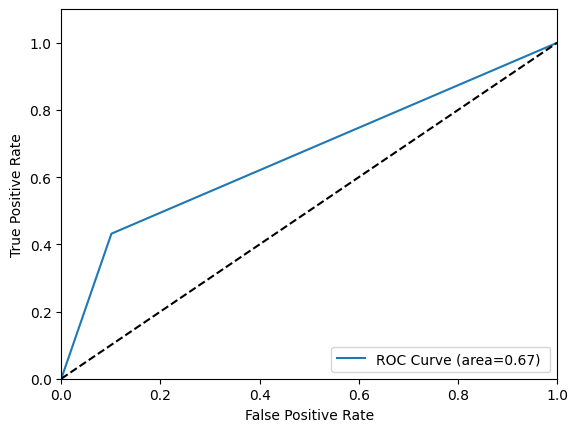

In [62]:
# ROC and AUC
FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)

plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [63]:
# Save the encoder
with open('loan_encoder.pkl', 'wb') as f:
    pickle.dump(OHE, f)

In [64]:
# Save the scaler
with open('loan_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [65]:
# Save the trained model
with open('loan_defaults_model.pkl', 'wb') as f:
    pickle.dump(rf_model_tun, f)